In [3]:
import pandas as pd


In [ ]:
df = pd.read_excel("/Users/kishoreraj/Documents/rejects.xlsx")

In [3]:
df

,Email,Status
0,Thank you for your keen interest and applying ...,Reject
1,Thank you for submitting your resume to Grubhu...,Not_Reject
2,Thank you for submitting your resume to Red Ve...,Reject
3,Thank you for applying to the Data Scientist o...,Reject
4,Thank you for taking your time to apply to the...,Reject
5,My name is Sravan and I'm an IT recruiter at P...,Not_Reject
6,Thank you very much for your recent applicatio...,Not_Reject
7,Greetings! I hope that you are all enjoying a...,Not_Reject
8,Thank you for your interest in Goldman Sachs. ...,Not_Reject
9,Your application for the Data Analyst position...,Not_Reject


In [6]:
import string
import matplotlib.pyplot as plt

#converting to lowercase
df.Email = df.Email.apply(lambda x: x.lower())
#removing punctuations
df.Email = df.Email.apply(lambda x: x.translate(str.maketrans('','',string.punctuation)))
#removing numbers
df.Email = df.Email.apply(lambda x: x.translate(str.maketrans('','','1234567890')))


In [7]:
df

,Email,Status
0,thank you for your keen interest and applying ...,Reject
1,thank you for submitting your resume to grubhu...,Not_Reject
2,thank you for submitting your resume to red ve...,Reject
3,thank you for applying to the data scientist o...,Reject
4,thank you for taking your time to apply to the...,Reject
5,my name is sravan and im an it recruiter at pr...,Not_Reject
6,thank you very much for your recent applicatio...,Not_Reject
7,greetings i hope that you are all enjoying an...,Not_Reject
8,thank you for your interest in goldman sachs y...,Not_Reject
9,your application for the data analyst position...,Not_Reject


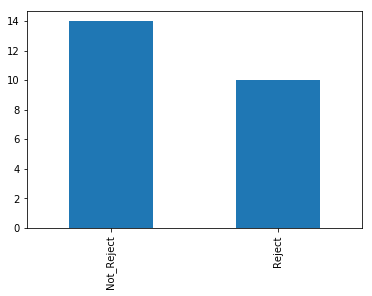

In [8]:
## Visualozong number of rejects and not reject

df['Status'].value_counts().plot(kind="bar")
plt.show()

In [11]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer, TfidfTransformer
from sklearn.preprocessing import LabelEncoder
from sklearn.naive_bayes import MultinomialNB
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.model_selection import cross_val_score




# pull the data into vectors
vectorizer = CountVectorizer()
x = vectorizer.fit_transform(df['Email'])


encoder = LabelEncoder()
y = encoder.fit_transform(df['Status'])



# split into train and test sets
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2)

# take a look at the shape of each of these
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)




(19, 465)
(19,)
(5, 465)
(5,)


In [18]:
## Fitting Mulinomial Naive Bayes

print(x)
nb = MultinomialNB()
nb.fit(x_train, y_train)

  (0, 417)	1
  (0, 415)	1
  (0, 38)	1
  (0, 146)	1
  (0, 198)	1
  (0, 312)	1
  (0, 422)	1
  (0, 322)	1
  (0, 27)	1
  (0, 268)	1
  (0, 223)	1
  (0, 406)	1
  (0, 115)	1
  (0, 425)	1
  (0, 163)	1
  (0, 306)	1
  (0, 418)	3
  (0, 258)	1
  (0, 196)	1
  (0, 212)	1
  (0, 215)	1
  (0, 405)	1
  (0, 85)	1
  (0, 180)	1
  (0, 87)	1
  :	:
  (23, 411)	2
  (23, 221)	1
  (23, 272)	1
  (23, 217)	1
  (23, 241)	1
  (23, 453)	1
  (23, 38)	2
  (23, 406)	4
  (23, 418)	1
  (23, 196)	1
  (23, 212)	1
  (23, 215)	3
  (23, 405)	2
  (23, 290)	1
  (23, 284)	1
  (23, 267)	1
  (23, 136)	1
  (23, 269)	1
  (23, 33)	1
  (23, 442)	1
  (23, 457)	2
  (23, 20)	2
  (23, 463)	1
  (23, 155)	2
  (23, 462)	1


MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True)

In [13]:
def predict_reject(title):
    category_names = {'Reject' : 'Reject', 'Not_Reject' : 'Not_Reject'}
    cod = nb.predict(vectorizer.transform([title]))
    return category_names[encoder.inverse_transform(cod)[0]]


print(predict_reject("We hope the best for your future"))
print(predict_reject("Good Luck"))
print(predict_reject("It was great having you"))

print(predict_reject("For more details, refer chapter 2"))
print(predict_reject("President of USA announces a new policy"))
print(predict_reject("It was raining this morning"))

Reject
Reject
Not_Reject
Not_Reject
Not_Reject
Not_Reject


In [28]:
from sklearn.linear_model import LogisticRegression
from sklearn.multiclass import OneVsRestClassifier

# Instantiate the classifier: clf
clf = OneVsRestClassifier(LogisticRegression())

# Fit the classifier to the training data
clf.fit(x_train, y_train)
ds_predict = clf.predict(x_test)
accuracy_score(y_test, ds_predict)


1.0

In [15]:
x_test_clv_pred = clf.predict(x_test)
confusion_matrix(y_test, x_test_clv_pred)
print(classification_report(y_test, x_test_clv_pred, target_names=encoder.classes_))

             precision    recall  f1-score   support

 Not_Reject       1.00      1.00      1.00         1
     Reject       1.00      1.00      1.00         4

avg / total       1.00      1.00      1.00         5



In [24]:
from sklearn import tree
from sklearn.metrics import accuracy_score

clf = tree.DecisionTreeClassifier()
clf.fit(x_train,y_train)
y_pred = clf.predict(x_test)

accuracy_score(y_test, y_pred)



0.59999999999999998

In [32]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import make_classification


clf = RandomForestClassifier(max_depth=2, random_state=0)
clf.fit(x_train, y_train)

rf_pred = clf.predict(x_test)

accuracy_score(y_test,rf_pred)

0.40000000000000002